In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
# import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [66]:
print((X_train.shape, Y_train.shape),(X_test.shape,Y_test.shape))
print(type(X_train))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))
<class 'numpy.ndarray'>


In [6]:
# Training data = 60,000 images
#Test Data = 10,000 images

In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

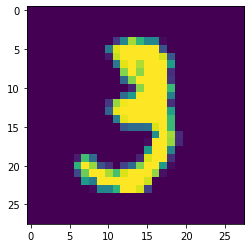

3


In [8]:
# displaying the image
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])


In [9]:
#printing unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
#all the images have the same dimension in this dataset

In [11]:
#normalisation of the values
X_train=X_train/255
X_test = X_test/255


In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

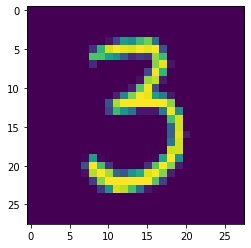

In [13]:
plt.imshow(X_train[50])

In [14]:
#Building the neural network 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [15]:
 model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2950 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1359 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1001 - accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0456 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

In [17]:
#model 
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9718


In [18]:
print(X_test.shape)

(10000, 28, 28)


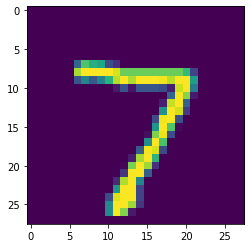

In [19]:
plt.imshow(X_test[0])
plt.show()

In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [21]:
Y_pred[0]

array([1.2227517e-04, 7.5117109e-04, 1.0737401e-02, 7.4116343e-01,
       6.9432135e-06, 4.3293285e-06, 1.5539919e-10, 9.9999791e-01,
       1.0559045e-03, 9.3271725e-02], dtype=float32)

In [48]:
a=sum(Y_pred[0])
Y_pred[0]=Y_pred[0]/(int)a*100
print(Y_pred[0])

SyntaxError: invalid syntax (Temp/ipykernel_13968/3191761371.py, line 2)

In [22]:
Y_pred[0]

array([1.2227517e-04, 7.5117109e-04, 1.0737401e-02, 7.4116343e-01,
       6.9432135e-06, 4.3293285e-06, 1.5539919e-10, 9.9999791e-01,
       1.0559045e-03, 9.3271725e-02], dtype=float32)

In [23]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
#Y_test --> True labels
#Y_pred_labels --> predictive labels
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_matrix)

tf.Tensor(
[[ 964    1    1    1    1    7    2    2    1    0]
 [   0 1122    3    2    0    2    2    2    2    0]
 [   4    4  997    3    2    0    2   17    2    1]
 [   0    0    1  965    0   21    0    6    8    9]
 [   0    0    4    1  960    0    4    3    0   10]
 [   2    0    0    4    3  874    3    0    2    4]
 [   6    2    2    0    3    6  936    0    3    0]
 [   1    6    7    0    1    0    0 1008    1    4]
 [   4    0    2    5    6   12    3    6  929    7]
 [   1    4    0    0   20    5    1   11    3  964]], shape=(10, 10), dtype=int32)


Text(0.5, 132.0, 'predicted labels')

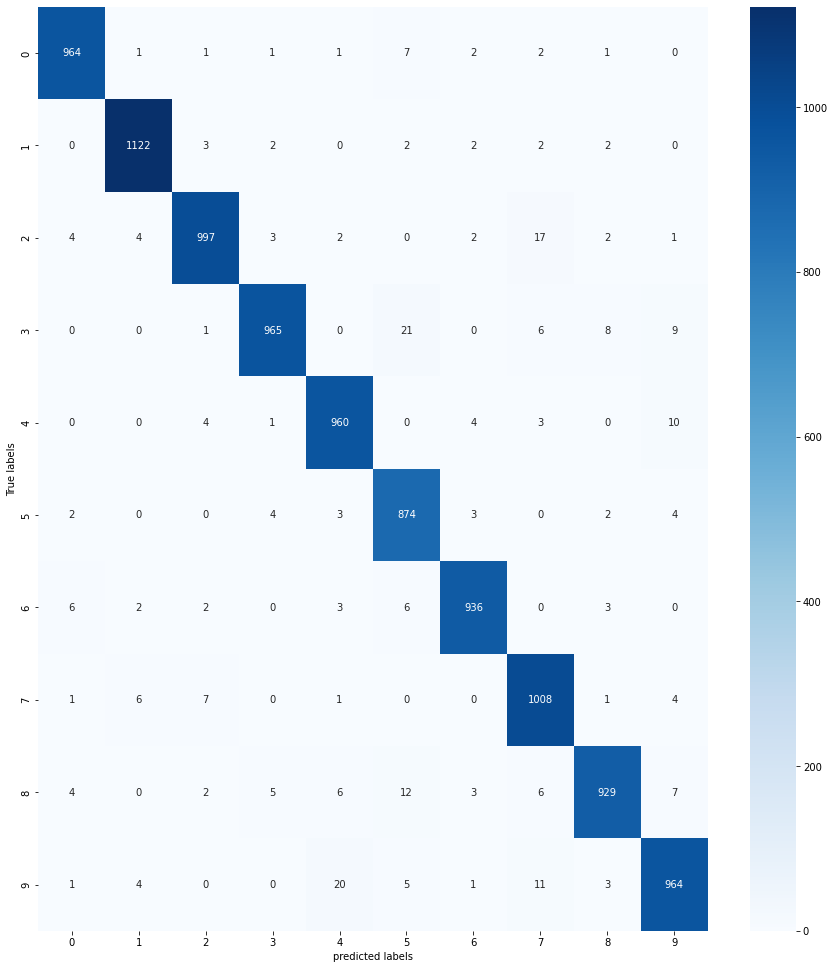

In [28]:
plt.figure(figsize=(15,17))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

In [54]:
img=Image.open("WhatsApp Image 2023-07-25 at 14..jpg")

In [55]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x15911F99750>


In [107]:
input_image=cv2.imread("\Aditya Takkar\Downloads\WhatsApp Image 2023-07-25 at 14.43.03.jpg")

In [108]:
print(input_image)

None


In [56]:
print(img.size)

(28, 28)


In [57]:
img=np.array(img)

In [58]:
print(img)

[[[159 164 160]
  [159 164 160]
  [159 164 160]
  ...
  [163 168 162]
  [163 168 164]
  [163 168 164]]

 [[159 164 160]
  [159 164 160]
  [159 164 160]
  ...
  [163 168 162]
  [163 168 164]
  [163 168 164]]

 [[159 164 160]
  [159 164 160]
  [159 164 160]
  ...
  [163 168 162]
  [163 168 164]
  [163 168 164]]

 ...

 [[157 161 164]
  [157 161 164]
  [157 161 164]
  ...
  [161 165 166]
  [161 165 164]
  [161 165 164]]

 [[157 161 164]
  [157 161 164]
  [157 161 164]
  ...
  [161 165 164]
  [161 165 164]
  [161 165 164]]

 [[157 161 164]
  [157 161 164]
  [157 161 164]
  ...
  [161 165 164]
  [161 165 164]
  [161 165 164]]]


(28, 28, 3)


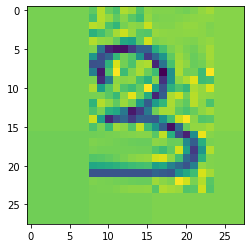

In [105]:
print(img.shape)
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.show()
gray_image=gray_image/255
plt.imshow(gray_image)
plt.show()
image_reshape=np.reshape(X_train[10],[1,28,28])
# arr=np.zeros ((1,28,28))
# arr[0]=np.array(gray_image)
# print(arr.shape)

1/1 [==============================] - 0s 24ms/step


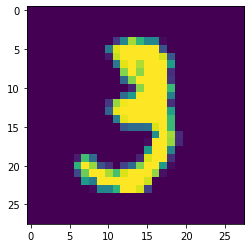

In [106]:
ans=model.predict(image_reshape)
plt.imshow(image_reshape[0])

In [104]:
print(ans)

[[2.8101195e-07 3.5610264e-03 1.3293124e-04 1.0000000e+00 3.2964967e-10
  8.6041850e-01 1.8133739e-13 4.6041869e-06 1.4311912e-02 9.7867191e-01]]


In [ ]:
input_image_path = input("path of input image : ")
input_image=cv.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize /= 255
img_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(img_reshaped)
input_pred_label= np.argmax(input_prediction)
print('The Handwritten Digit recognised as ', input_pred_label)